In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dfx_train = pd.read_csv('Linear_X_Train.csv')
dfx_train.head()

,x
0,-0.289307
1,-0.588810
2,1.027507
3,-0.259013
4,0.782043


In [4]:
dfy_train = pd.read_csv('Linear_Y_Train.csv')
dfy_train.head()

,y
0,-0.091101
1,-53.467721
2,75.457009
3,-12.025286
4,57.414187


In [23]:
X_test = pd.read_csv('Linear_X_Test.csv')

In [5]:
#converting to numpy arrays
x_train = dfx_train.values
y_train = dfy_train.values

x_train.reshape((-1,1))
y_train.reshape((-1,1))

array([[-9.11011171e-02],
       [-5.34677208e+01],
       [ 7.54570088e+01],
       ...,
       [-3.49832749e+01],
       [ 1.45206092e+02],
       [-1.71244939e+01]])

In [6]:
#normalization

x_train = (x_train - x_train.mean()) / (x_train.std())
x_train

array([[-0.25352061],
       [-0.55541377],
       [ 1.07380656],
       ...,
       [-0.26950343],
       [ 1.72730762],
       [-0.4575866 ]])

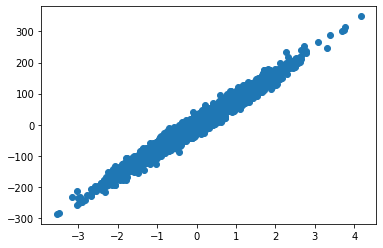

In [7]:
plt.scatter(x_train,y_train)
plt.show()

In [8]:
#plotting the line which fits the data points

# without sklearn

In [9]:
def hypothesis(x,theta):
    return(theta[0] + theta[1]*x) # h(x) = m*x + c    

In [10]:
def error(x,y,theta):
    
    err = 0.0
    
    for i in range(x.shape[0]):
        
        hx = hypothesis(x[i],theta)
        err += (hx - y[i])**2
    
    return(err/(2*x.shape[0]))

In [11]:
def gradient(x,y,theta): 
    
    grad = np.zeros((2,))
    
    for i in range(x.shape[0]):
        
        hx = hypothesis(x[i],theta)
        grad[0] += (hx - y[i])
        grad[1] += (hx - y[i])*x[i]
    
    return(grad/x.shape[0])

In [12]:
def gradient_descent(x,y,learning_rate = 0.01):
    
    #initializing random theta values
    
    theta = np.array([-10.0,0.0])
    max_iter = 1000
    
    itr = 0
    err_list = []
    theta_list = []
    
    while(itr <= max_iter):
        
        grad = gradient(x,y,theta)
        err = error(x,y,theta)
        err_list.append(err)
        theta_list.append(theta)
        
        theta[0] -= learning_rate * grad[0]
        theta[1] -= learning_rate * grad[1]
        
        itr += 1
    
    return(theta,err_list,theta_list)

In [14]:
#splitting 0.8
print(x_train.shape)

(3750, 1)


In [17]:
0.8 * 3750

3000.0

In [43]:
#splitting data into training and testing
x_tr = x_train[:3000]
y_tr = y_train[:3000]

x_val = x_train[3000:]
y_val = y_train[3000:]

In [19]:
final_theta,err_list,theta_list = gradient_descent(x_tr,y_tr)

In [20]:
print(final_theta)

[ 0.80773165 79.88242938]


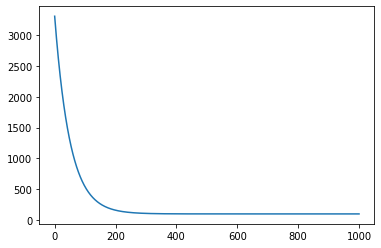

In [21]:
plt.plot(err_list)

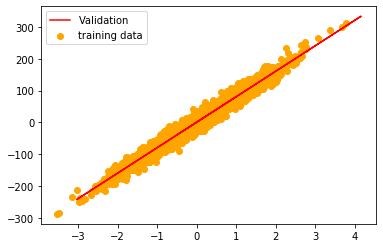

In [44]:
plt.scatter(x_tr,y_tr,label = "training data",color = 'orange')
plt.plot(x_val,hypothesis(x_val,final_theta), color = 'red', label = 'Validation')
plt.legend()
plt.show()

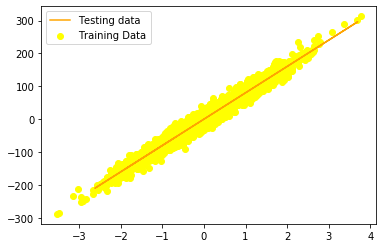

In [31]:
#ploting with testing data

plt.scatter(x_tr,y_tr,label = "Training Data", color = 'yellow')
plt.plot(X_test,hypothesis(X_test,final_theta),color = 'orange',label = 'Testing data')
plt.legend()
plt.show()

# With sklearn

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
model = LinearRegression()

In [34]:
model.fit(x_tr,y_tr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
bias = model.intercept_
bias

array([0.80764905])

In [36]:
coeff = model.coef_
coeff

array([[79.88635585]])

In [46]:
#testing with X_tes

y_val_predict = model.predict(x_val)

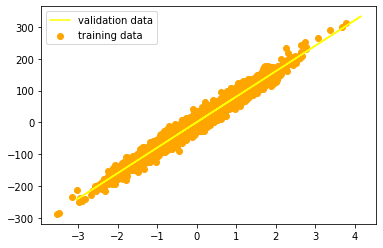

In [53]:
#visulaizing

plt.scatter(x_tr,y_tr,color = 'orange',label = 'training data')
plt.plot(x_val,y_val_predict,color = 'yellow',label = 'validation data')
plt.legend()
plt.show()

In [47]:
mse = mean_squared_error(y_val, y_val_predict)
print("mean squared error ", mse)

mean squared error  179.65907316972917


In [48]:
r2score = r2_score(y_val,y_val_predict)
print("r2_score ",r2score)

r2_score  0.9740465841995022


In [58]:
print(model.score(x_val,y_val))

0.9740465841995022


In [55]:
#for testing data

Y_test_pred = model.predict(X_test)

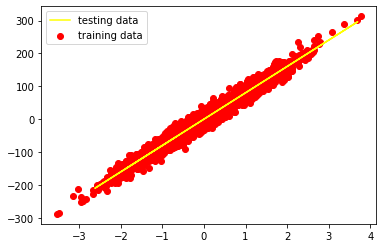

In [56]:
#visualizing

plt.scatter(x_tr,y_tr,color = 'red',label ='training data')
plt.plot(X_test,Y_test_pred,color = 'yellow', label = 'testing data')
plt.legend()
plt.show()